<a href="https://colab.research.google.com/github/micheldc55/cheatsheet/blob/main/02_mi_regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
COLAB = True

In [ ]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1q2shS6fBq_pSI8CBrjzdgg6DTTZfZ2mJ',
                                        dest_path='./funciones_auxiliares.py')
    gdd.download_file_from_google_drive(file_id='1o2ZUFTRmKf9N8Dx4WDzF2fzaYGErpTlF',
                                        dest_path='./datasets/fuga_clientes/fuga_clientes_empresa_telefonica_construccion.csv')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
PROBLEMA_FUGAS = True

In [ ]:
if PROBLEMA_FUGAS:
    path = './datasets/fuga_clientes/'
    X_df = pd.read_csv(path+'fuga_clientes_empresa_telefonica_construccion.csv')
    X_df.drop('Customer ID', axis=1, inplace=True)
    X = X_df.drop("Churn Status", axis=1).values
    y = X_df["Churn Status"].values
else:
    a = load_breast_cancer()
    
    X = a.data
    y = a.target
    X_df = pd.DataFrame(columns=a.feature_names, data=X)
    X_df["target"] = y

X_df[:5]

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
0,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
X.shape

(1110, 23)

In [ ]:
y.shape

(1110,)

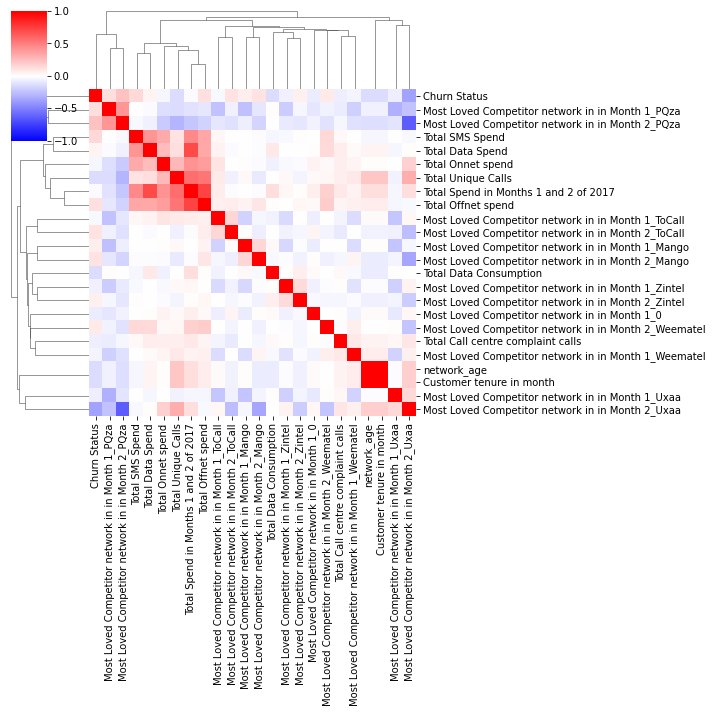

In [ ]:
import seaborn as sns

sns.clustermap(X_df.corr(), vmin=-1, vmax=1, cmap='bwr');

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

#### Estandarización de las variables

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc  = sc.transform(X_test)

#### Creación del modelo en scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e10)
model

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.fit(X_train_sc, y_train)
y_train_pred = model.predict(X_train_sc)
y_test_pred  = model.predict(X_test_sc)

In [ ]:
y_test_pred[:5]

array([0, 0, 1, 0, 0])

In [ ]:
model.predict_proba(X_test_sc)[:5]

array([[0.51428443, 0.48571557],
       [0.59474148, 0.40525852],
       [0.49592572, 0.50407428],
       [0.8409348 , 0.1590652 ],
       [0.50463243, 0.49536757]])

In [ ]:
scores = model.predict_proba(X_train_sc)[:,1]

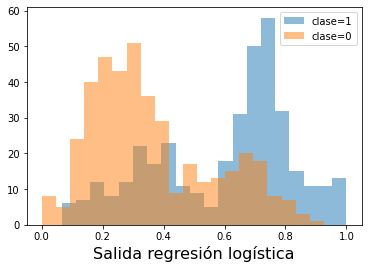

In [ ]:
plt.hist(scores[y_train==1], bins=20, label="clase=1", alpha=0.5)
plt.hist(scores[y_train==0], bins=20, label="clase=0", alpha=0.5)
plt.legend()
plt.xlabel("Salida regresión logística", fontsize=16);

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test,  y_test_pred))

0.7194337194337195
0.7057057057057057


In [ ]:
from funciones_auxiliares import analisis_roc, plot_confusion_matrix

Confusion matrix, without normalization
[[116  49]
 [ 49 119]]


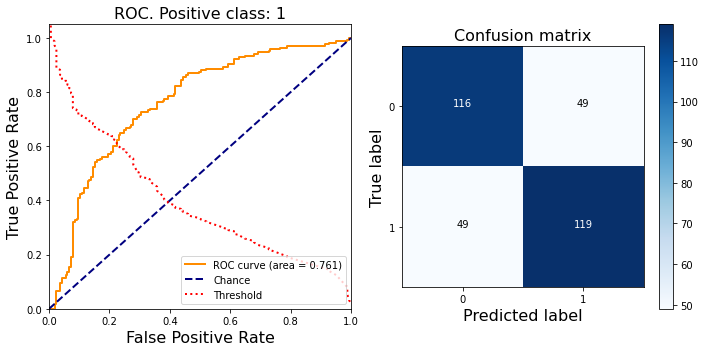

In [ ]:
# Resultados detallados en test
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
analisis_roc(y_test, model.predict_proba(X_test_sc)[:,1])
plt.subplot(1,2,2)
plot_confusion_matrix(y_test, y_test_pred)

In [ ]:
# Modelo dummy
from sklearn.dummy import DummyClassifier

model2 = DummyClassifier(strategy='most_frequent')
model2.fit(X_train_sc, y_train)
y_test_pred  = model2.predict(X_test_sc)
model2.score(X_train_sc, y_train), model2.score(X_test_sc, y_test)

(0.5225225225225225, 0.4954954954954955)

Confusion matrix, without normalization
[[165   0]
 [168   0]]


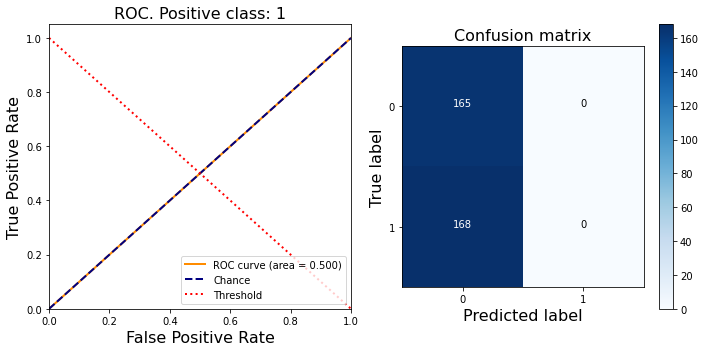

In [ ]:
# Resultados detallados en test
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
analisis_roc(y_test, model2.predict_proba(X_test_sc)[:,1])
plt.subplot(1,2,2)
plot_confusion_matrix(y_test, y_test_pred)

### Mi regresión logística

In [ ]:
def my_model(x, w):
    aux = w[0] + x.dot(w[1:])
    return 1/(1+np.exp(-aux))


In [ ]:
my_model(X_train_sc[:,:3], np.array([1,1,0,0]))

In [ ]:
my_model(X_train_sc[:,:3], np.array([1,1,0,0])).shape

Below we are calculating the error function. Since this is a classification problem, the error function isn't the typical RMSE, but we generally use the Cross-Entropy or log-loss. 

This is because RMSE will be either 0 or 1 for all values, and when we modify the parameters by an epsilon, most categories will not change. And therefore most gradients will be zero. So we need another alternative (a more responsive error function).

Cross-Entropy is calculated as:
log-loss = mean( Ln(1 / Pmodel(real class)))  

Pmodel is the probability that the model returns, so after the activation function. For example if a model has a Probability of predicting a class A of 0.8, and the real class is A, then:

- log-loss = Ln (1 / 0.8) = Ln ( > 1) > 0

Si mi modelo tiene 100% de predecir la clase B y la clase real es la A (mi modelo está 100% seguro de algo que está mal):

- Pmodel(class A) = 0

- log-loss = Ln(1 / 0) = Ln(+inf) = +inf

In [ ]:
from sklearn.metrics import log_loss, accuracy_score

def mi_funcion_error(datos, w):
    X, y = datos
    ypred = my_model(X,w)
    #return accuracy_score(y, 1*(ypred>0.5))
    return log_loss(y, ypred) + 0.01*sum(np.abs(w)) + 0.05*sum(w**2) # El valor 0.01*np.abs(w) fuerza a que el modelo no sea demasiado complejo (lo hace forzando a que los wi 
                                                                     # sean menores)
                                                                     # La segunda regularización 0.05*sum(w**2) fuerza a lo mismo. Ambos son factores de regularización!! Está
                                                                     # forzando a que algunos coeficientes sean nulos

In [ ]:
x = np.linspace(1, 1e2, 1001)
plt.plot(x, np.log(x));

In [ ]:
np.log(1/0.8), - np.log(0.8)

In [ ]:
log_loss([0, 1], [0, 0.8])

In [ ]:
np.log(1/0.8)

In [ ]:
def calcula_grad(funcion_error, datos, w, eps=1e-4):
    e_sinpert = funcion_error(datos,w)
    grad = np.zeros(len(w))
    for i in range(len(w)):
        a = w[i]
        w[i] += eps
        e_pert = funcion_error(datos,w)
        grad[i] = (e_pert - e_sinpert) / eps
        w[i] = a
    
    return grad
        

In [ ]:
calcula_grad(mi_funcion_error,
             (X_train_sc[:20,:3], y_train[:20]),
             np.array([0,0.1,-0.8,2.]))

In [ ]:
# X_train lo dividimos en X_tr_sc (en él se va a ajustar
# la red) y en X_val_sc

porc_val = 0.3
Nval = int(porc_val*len(X_train)) # 600

X_val_sc = X_train_sc[-Nval:]
X_val    = X_train[-Nval:]
y_val    = y_train[-Nval:]

X_tr_sc  = X_train_sc[:-Nval]
X_tr     = X_train[:-Nval]
y_tr     = y_train[:-Nval]

In [ ]:
print(X_train_sc.shape)
print(X_tr_sc.shape)
print(X_val_sc.shape)

In [ ]:
import pickle

In [ ]:
nepocas    = 200
batch_size = 20
alpha = 0.01 # factor de aprendizaje
nfichero = "mi_red.pkl"

Ntr = len(X_tr_sc)
w = np.random.randn(1+X.shape[1])
errores_tr = []
errores_val = []

error_minimo_val    = 1e20
mejor_configuracion = w

Nshow = 10 # número de épocas que esperamos para visualizar

for e in range(nepocas):
    for b in range(0, Ntr, batch_size):
        X_lote = X_tr_sc[b:(b+batch_size)]
        y_lote = y_tr[b:(b+batch_size)]
        grad = calcula_grad(mi_funcion_error,
                            (X_lote, y_lote), w)
        w -= alpha*grad
    aux  = mi_funcion_error((X_tr_sc,y_tr), w)
    aux2 = mi_funcion_error((X_val_sc,y_val), w)
    if aux2 < error_minimo_val:
        error_minimo_val = aux2
        with open(nfichero,"wb") as f:
            pickle.dump(w, f)   
#        mejor_configuracion = w.copy()
        print("Se mejora el error_minimo_val")
        
    print("Epoca", e, ", error tr:", aux.round(3),
          "error val:", aux2.round(3))
    errores_tr.append(aux)
    errores_val.append(aux2)
    
    if (e % Nshow) == 0:
        plt.figure(figsize=(12,3))
        plt.plot(errores_tr,  label='error tr')
        plt.plot(errores_val, label='error val')
        plt.legend()
        plt.show()

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(errores_tr);

In [ ]:
#w = mejor_configuracion
with open(nfichero,"rb") as f:
    w = pickle.load(f)

In [ ]:
# Resultados detallados en test
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
y_test_proba = my_model(X_test_sc, w)
analisis_roc(y_test, y_test_proba)
plt.subplot(1,2,2)
plot_confusion_matrix(y_test, 1*(y_test_proba>0.5))

In [ ]:
w[1:]

In [ ]:
model.intercept_

In [ ]:
model.coef_